In [1]:
import catboost as cb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# 카테고리 통합 스케일링 모델

In [2]:
# 데이터셋 로드
df_grouped_2 = pd.read_csv('train_data_origin.csv')

# # X와 y로 데이터 분할
X_2 = df_grouped_2.drop("recipeid", axis=1)
y_2 = df_grouped_2["recipeid"]

# 훈련 세트와 테스트 세트로 데이터 분할
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
# 모델 로드
loaded_model_2 = cb.CatBoostClassifier()
loaded_model_2.load_model('../model/catboost_model_origin_new.bin')
label_mapping = {idx: label for idx, label in enumerate(loaded_model_2.classes_)}

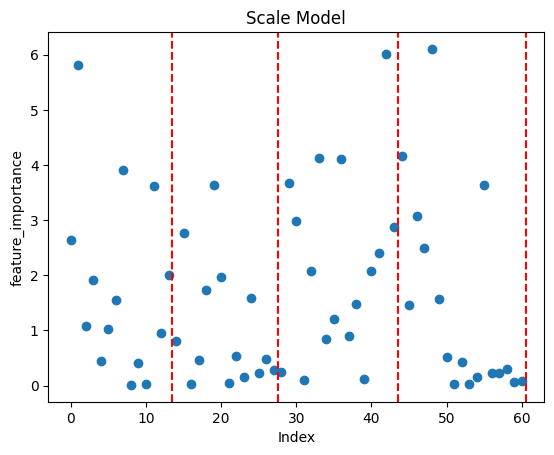

In [3]:
plt.scatter(range(len(loaded_model_2.get_feature_importance())), loaded_model_2.get_feature_importance())
plt.title("Scale Model")
plt.xlabel("Index")
plt.ylabel("feature_importance")
plt.axvline(x=13.5, color='r', linestyle='--')
plt.axvline(x=27.5, color='r', linestyle='--')
plt.axvline(x=43.5, color='r', linestyle='--')
plt.axvline(x=60.5, color='r', linestyle='--')
plt.show()

In [4]:
# 테스트 세트에 대한 예측 확률 계산
probabilities = loaded_model_2.predict_proba(X_test_2)
# for TOP_K in [1,2,3,4,5,10,15,20,25,30,35,40,45,50,100,200]:
for TOP_K in [1, 5, 10]:
    # 상위 top_k개 클래스 레이블 반환
    top_k_classes = probabilities.argsort(axis=1)[:, -TOP_K:].tolist()
    result = {}
    for index, i in enumerate(top_k_classes):
        result[index] = i

    # top_10_classes 리스트의 각 요소를 label_mapping을 사용하여 변경
    converted_top_k_classes = []
    for classes in top_k_classes:
        converted_classes = [label_mapping[label] for label in classes]
        converted_top_k_classes.append(converted_classes)

    y_test_li = y_test_2.to_list()

    cnt = 0
    for y_test_value, top_k_value_list in zip(y_test_li, converted_top_k_classes):
        if y_test_value in top_k_value_list:
            cnt += 1


    combined_list = []
    for sublist in converted_top_k_classes:
        combined_list.extend(sublist)

    # F1 스코어 계산
    # converted_top_k_classes는 리스트의 리스트이므로 각 서브리스트의 첫 번째 원소를 예측값으로 사용합니다.
    predicted_labels = [cls[0] for cls in converted_top_k_classes]
    f1 = f1_score(y_test_li, predicted_labels, average='micro')  # 'micro'는 모든 클래스를 고려하여 F1 스코어를 계산합니다.


    print(f'top_{TOP_K}')
    print(f'output_unique: {len(set(combined_list))}, origin_unique: {len(loaded_model_2.classes_)}')
    print(f'correct: {cnt}, incorrect: {len(y_test_2) - cnt}')
    print(f'accuracy: {round(cnt / len(y_test_2) * 100, 2)}%')
    # print(f'F1 score: {round(f1, 2)}')

top_1
output_unique: 1336, origin_unique: 2361
correct: 1919, incorrect: 16637
accuracy: 10.34%
top_5
output_unique: 2096, origin_unique: 2361
correct: 4687, incorrect: 13869
accuracy: 25.26%
top_10
output_unique: 2280, origin_unique: 2361
correct: 6318, incorrect: 12238
accuracy: 34.05%


# 카테고리 종류별 분리 스케일링 모델

In [5]:
# 데이터셋 로드
df_grouped = pd.read_csv('train_data_scale.csv')

# # X와 y로 데이터 분할
X = df_grouped.drop("recipeid", axis=1)
y = df_grouped["recipeid"]

# 훈련 세트와 테스트 세트로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 모델 로드
loaded_model = cb.CatBoostClassifier()
loaded_model.load_model('../model/catboost_model_scale.bin')
label_mapping = {idx: label for idx, label in enumerate(loaded_model.classes_)}

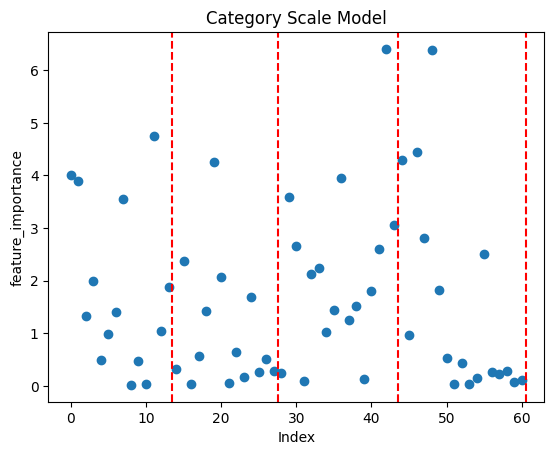

In [6]:
plt.scatter(range(len(loaded_model.get_feature_importance())), loaded_model.get_feature_importance())
plt.title("Category Scale Model")
plt.xlabel("Index")
plt.ylabel("feature_importance")
plt.axvline(x=13.5, color='r', linestyle='--')
plt.axvline(x=27.5, color='r', linestyle='--')
plt.axvline(x=43.5, color='r', linestyle='--')
plt.axvline(x=60.5, color='r', linestyle='--')
plt.show()

In [7]:
# 테스트 세트에 대한 예측 확률 계산
probabilities = loaded_model.predict_proba(X_test)
# for TOP_K in [1,2,3,4,5,10,15,20,25,30,35,40,45,50,100,200]:
for TOP_K in [1, 5, 10]:
    # 상위 top_k개 클래스 레이블 반환
    top_k_classes = probabilities.argsort(axis=1)[:, -TOP_K:].tolist()
    result = {}
    for index, i in enumerate(top_k_classes):
        result[index] = i

    # top_10_classes 리스트의 각 요소를 label_mapping을 사용하여 변경
    converted_top_k_classes = []
    for classes in top_k_classes:
        converted_classes = [label_mapping[label] for label in classes]
        converted_top_k_classes.append(converted_classes)

    y_test_li = y_test.to_list()

    cnt = 0
    for y_test_value, top_k_value_list in zip(y_test_li, converted_top_k_classes):
        if y_test_value in top_k_value_list:
            cnt += 1

    combined_list = []
    for sublist in converted_top_k_classes:
        combined_list.extend(sublist)

    # F1 스코어 계산
    # converted_top_k_classes는 리스트의 리스트이므로 각 서브리스트의 첫 번째 원소를 예측값으로 사용합니다.
    predicted_labels = [cls[0] for cls in converted_top_k_classes]
    f1 = f1_score(y_test_li, predicted_labels, average='micro')  # 'micro'는 모든 클래스를 고려하여 F1 스코어를 계산합니다.


    print(f'top_{TOP_K}')
    print(f'output_unique: {len(set(combined_list))}, origin_unique: {len(loaded_model.classes_)}')
    print(f'correct: {cnt}, incorrect: {len(y_test) - cnt}')
    print(f'accuracy: {round(cnt / len(y_test) * 100, 2)}%')
    # print(f'F1 score: {round(f1, 2)}')

top_1
output_unique: 1473, origin_unique: 2361
correct: 1863, incorrect: 16693
accuracy: 10.04%
top_5
output_unique: 2145, origin_unique: 2361
correct: 4690, incorrect: 13866
accuracy: 25.27%
top_10
output_unique: 2303, origin_unique: 2361
correct: 6313, incorrect: 12243
accuracy: 34.02%


# feature_importance 유사도

In [8]:
import numpy as np

def cosine_similarity(list1, list2):
  list1 = np.array(list1)
  list2 = np.array(list2)
  list1_norm = np.linalg.norm(list1)
  list2_norm = np.linalg.norm(list2)
  return np.dot(list1, list2) / (list1_norm * list2_norm)

def pearson_similarity(a, b):
    return np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))


model_FI = loaded_model.get_feature_importance()
model_FI_2 = loaded_model_2.get_feature_importance()
cosine_similarity(model_FI, model_FI_2), pearson_similarity(model_FI, model_FI_2)

(0.9756390993864898, 0.9507877417908887)

# predict code

In [9]:
def recommend_category(loaded_model, input_list, top_k = 10):
    input_list = np.array(ast.literal_eval(input_list))
    input_list = input_list / np.max(input_list)
    input_list = np.round(input_list, decimals=2)
    probabilities = loaded_model.predict_proba(input_list)
    top_k_classes = probabilities.argsort()[-top_k:].tolist()
    result = [label_mapping[label] for label in top_k_classes]
    return str(result)

# test
input_li = "[2, 2, 0, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 6, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 4, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0]"
print(recommend_category(loaded_model, input_li, 10))
print(recommend_category(loaded_model_2, input_li, 10))

[6897374, 6871728, 6874103, 6884469, 6871104, 6879215, 6894096, 6868389, 6906655, 6880798]
[6874103, 6871728, 6879215, 6902125, 6899335, 6881099, 6906655, 6868389, 6894096, 6880798]


# - Ensemble

In [14]:
# for TOP_K in [1,2,3,4,5,10,15,20,25,30,35,40,45,50,100,200]:
# 테스트 세트에 대한 예측 확률 계산
probabilities_1 = loaded_model.predict_proba(X_test)
probabilities_2 = loaded_model_2.predict_proba(X_test_2)
# ----- 두 가지 방식중 선택 ----- #
probabilities = np.array(probabilities_1) + np.array(probabilities_2)
for TOP_K in [1, 5, 10]:
    # 상위 top_k개 클래스 레이블 반환
    top_k_classes = probabilities.argsort(axis=1)[:, -TOP_K:].tolist()
    result = {}
    for index, i in enumerate(top_k_classes):
        result[index] = i

    # top_10_classes 리스트의 각 요소를 label_mapping을 사용하여 변경
    converted_top_k_classes = []
    for classes in top_k_classes:
        converted_classes = [label_mapping[label] for label in classes]
        converted_top_k_classes.append(converted_classes)

    y_test_li = y_test.to_list()

    cnt = 0
    for y_test_value, top_k_value_list in zip(y_test_li, converted_top_k_classes):
        if y_test_value in top_k_value_list:
            cnt += 1


    combined_list = []
    for sublist in converted_top_k_classes:
        combined_list.extend(sublist)

    # F1 스코어 계산
    # converted_top_k_classes는 리스트의 리스트이므로 각 서브리스트의 첫 번째 원소를 예측값으로 사용합니다.
    predicted_labels = [cls[0] for cls in converted_top_k_classes]
    f1 = f1_score(y_test_li, predicted_labels, average='micro')  # 'micro'는 모든 클래스를 고려하여 F1 스코어를 계산합니다.


    print(f'top_{TOP_K}')
    print(f'output_unique: {len(set(combined_list))}, origin_unique: {len(loaded_model.classes_)}')
    print(f'correct: {cnt}, incorrect: {len(y_test) - cnt}')
    print(f'accuracy: {round(cnt / len(y_test) * 100, 2)}%')
    # print(f'F1 score: {round(f1, 2)}')

top_1
output_unique: 1412, origin_unique: 2361
correct: 1941, incorrect: 16615
accuracy: 10.46%
top_5
output_unique: 2123, origin_unique: 2361
correct: 4762, incorrect: 13794
accuracy: 25.66%
top_10
output_unique: 2296, origin_unique: 2361
correct: 6390, incorrect: 12166
accuracy: 34.44%


In [13]:
# for TOP_K in [1,2,3,4,5,10,15,20,25,30,35,40,45,50,100,200]:
# 테스트 세트에 대한 예측 확률 계산
probabilities_1 = loaded_model.predict_proba(X_test)
probabilities_2 = loaded_model_2.predict_proba(X_test_2)

probabilities = np.array(probabilities_1) / np.amax(np.array(probabilities_1), axis=1).reshape(-1, 1) + np.array(probabilities_2) / np.amax(np.array(probabilities_2), axis=1).reshape(-1, 1)
for TOP_K in [1, 5, 10]:
    # 상위 top_k개 클래스 레이블 반환
    top_k_classes = probabilities.argsort(axis=1)[:, -TOP_K:].tolist()
    result = {}
    for index, i in enumerate(top_k_classes):
        result[index] = i

    # top_10_classes 리스트의 각 요소를 label_mapping을 사용하여 변경
    converted_top_k_classes = []
    for classes in top_k_classes:
        converted_classes = [label_mapping[label] for label in classes]
        converted_top_k_classes.append(converted_classes)

    y_test_li = y_test.to_list()

    cnt = 0
    for y_test_value, top_k_value_list in zip(y_test_li, converted_top_k_classes):
        if y_test_value in top_k_value_list:
            cnt += 1


    combined_list = []
    for sublist in converted_top_k_classes:
        combined_list.extend(sublist)

    # F1 스코어 계산
    # converted_top_k_classes는 리스트의 리스트이므로 각 서브리스트의 첫 번째 원소를 예측값으로 사용합니다.
    predicted_labels = [cls[0] for cls in converted_top_k_classes]
    f1 = f1_score(y_test_li, predicted_labels, average='micro')  # 'micro'는 모든 클래스를 고려하여 F1 스코어를 계산합니다.


    print(f'top_{TOP_K}')
    print(f'output_unique: {len(set(combined_list))}, origin_unique: {len(loaded_model.classes_)}')
    print(f'correct: {cnt}, incorrect: {len(y_test) - cnt}')
    print(f'accuracy: {round(cnt / len(y_test) * 100, 2)}%')
    # print(f'F1 score: {round(f1, 2)}')

top_1
output_unique: 1394, origin_unique: 2361
correct: 1946, incorrect: 16610
accuracy: 10.49%
top_5
output_unique: 2116, origin_unique: 2361
correct: 4750, incorrect: 13806
accuracy: 25.6%
top_10
output_unique: 2293, origin_unique: 2361
correct: 6381, incorrect: 12175
accuracy: 34.39%
